In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing

In [2]:
mult = 5

def load_file(path):
    data = pd.read_csv(path, sep=',')

    is_benign = data[' Label']=='BENIGN'
    flows_ok = data[is_benign]
    flows_ddos_full = data[~is_benign]
    
    sizeDownSample = len(flows_ok)*mult # tamanho do set final de dados anomalos
    
    # downsample majority
    if (len(flows_ok)*mult) < (len(flows_ddos_full)): 
        flows_ddos_reduced = resample(flows_ddos_full,
                                         replace = False, # sample without replacement
                                         n_samples = sizeDownSample, # match minority n
                                         random_state = 27) # reproducible results
    else:
        flows_ddos_reduced = flows_ddos_full
    
    return flows_ok, flows_ddos_reduced

 
def load_huge_file(path):
    df_chunk = pd.read_csv(path, chunksize=500000)
    
    chunk_list_ok = []  # append each chunk df here 
    chunk_list_ddos = [] 

    # Each chunk is in df format
    for chunk in df_chunk:  
        # perform data filtering 
        is_benign = chunk[' Label']=='BENIGN'
        flows_ok = chunk[is_benign]
        flows_ddos_full = chunk[~is_benign]
        
        if (len(flows_ok)*mult) < (len(flows_ddos_full)): 
            sizeDownSample = len(flows_ok)*mult # tamanho do set final de dados anomalos
            
            # downsample majority
            flows_ddos_reduced = resample(flows_ddos_full,
                                             replace = False, # sample without replacement
                                             n_samples = sizeDownSample, # match minority n
                                             random_state = 27) # reproducible results 
        else:
            flows_ddos_reduced = flows_ddos_full
            
        # Once the data filtering is done, append the chunk to list
        chunk_list_ok.append(flows_ok)
        chunk_list_ddos.append(flows_ddos_reduced)
        
    # concat the list into dataframe 
    flows_ok = pd.concat(chunk_list_ok)
    flows_ddos = pd.concat(chunk_list_ddos)
    
    return flows_ok, flows_ddos

In [3]:
# file 1
dataset_path = 'D:/DB2-CIC-DDoS2019/01-12/TFTP.csv'
flows_ok, flows_ddos = load_huge_file(dataset_path)
print('file 1 loaded')
# file 2
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_LDAP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_MSSQL.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_NetBIOS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_NTP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 5 loaded')

# file 6
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_SNMP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 6 loaded')

# file 7
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_SSDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 7 loaded')

# file 8
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_UDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 8 loaded')

# file 9
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/Syn.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 9 loaded')

# file 10
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/DrDoS_DNS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 10 loaded')

# file 11
a,b = load_file('D:/DB2-CIC-DDoS2019/01-12/UDPLag.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 11 loaded')

del a,b
samples = pd.concat([flows_ok, flows_ddos])
samples.to_csv(r'D:/DB2-CIC-DDoS2019/export_dataframe.csv', index=None, header=True)
del flows_ddos, flows_ok

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:31: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in df_chunk:
C:\Users\M.A\AppData\Local\Temp\ipykerne

file 1 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 2 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 3 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 4 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 5 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 6 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 7 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 8 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 9 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 10 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1373077970.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 11 loaded


In [4]:
# file 1
flows_ok, flows_ddos = load_file('D:/DB2-CIC-DDoS2019/03-11/LDAP.csv')
print('file 1 loaded')

# file 2
a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/MSSQL.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/NetBIOS.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/PortMap.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/Syn.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 5 loaded')


a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/UDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 6 loaded')

# file 7
a,b = load_file('D:/DB2-CIC-DDoS2019/03-11/UDPLag.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 7 loaded')

tests = flows_ok.append(flows_ddos,ignore_index=True)
tests.to_csv(r'D:/DB2-CIC-DDoS2019/export_tests.csv', index = None, header=True) 

del flows_ddos, flows_ok, a, b

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


file 1 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 2 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 3 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 4 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 5 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)


file 6 loaded


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3645198409.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ok = flows_ok.append(a,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flows_ddos = flows_ddos.append(b,ignore_index=True)
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3221935755.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tests = flows_ok.append(flows_ddos,ignore_index=True)


file 7 loaded


In [5]:
samples[' Label'].value_counts()
#class 1 not attack (BENIGN)
#class 0 attack

TFTP             116936
DrDoS_NTP         71825
BENIGN            56863
UDP-lag           18501
DrDoS_DNS         17010
DrDoS_UDP         10785
DrDoS_MSSQL       10030
DrDoS_NetBIOS      8535
DrDoS_LDAP         8060
DrDoS_SNMP         7535
DrDoS_SSDP         3815
Syn                1960
WebDDoS              24
Name:  Label, dtype: int64

In [6]:
df = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv')
df.describe()

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3357110480.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv')


,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,331879.000000,331879.000000,331879.000000,331879.000000,3.318790e+05,331879.000000,331879.000000,3.318790e+05,3.318790e+05,331879.000000,...,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,3.318790e+05,331879.000000
mean,38759.792521,33017.254948,28558.186203,14.934380,5.412908e+06,19.028658,1.287090,8.144450e+03,8.741786e+02,472.885757,...,-4.353178e+07,2.031828e+04,6.757852e+03,2.948089e+04,1.533640e+04,7.304154e+05,5.882386e+04,7.832600e+05,6.815046e+05,0.849870
std,70673.055798,27974.559351,21328.380593,4.357631,1.401351e+07,178.390152,17.901862,3.635224e+04,4.900743e+04,403.993390,...,2.106422e+08,3.468064e+05,1.778102e+05,5.457205e+05,2.833376e+05,5.355077e+06,8.746630e+05,5.642518e+06,5.189781e+06,0.357199
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4283.000000,793.000000,7755.500000,17.000000,2.000000e+00,2.000000,0.000000,4.940000e+02,0.000000e+00,247.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,14908.000000,42742.000000,27930.000000,17.000000,4.022000e+03,4.000000,0.000000,2.896000e+03,0.000000e+00,440.000000,...,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,33477.000000,62468.000000,47904.000000,17.000000,5.999848e+06,14.000000,0.000000,7.224000e+03,0.000000e+00,516.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,803865.000000,65534.000000,65535.000000,17.000000,1.200000e+08,99691.000000,4602.000000,1.526642e+07,1.099376e+07,32120.000000,...,1.480000e+03,2.417364e+07,1.919735e+07,4.451363e+07,2.257624e+07,1.192194e+08,6.600292e+07,1.192194e+08,1.192194e+08,1.000000


In [7]:
missing_values = samples.isnull().sum()
total_missing = missing_values.sum()
print("\nsamples_total_missing_in_all_data", total_missing)


samples_total_missing_in_all_data 2343


In [8]:
tests.shape

(341790, 88)

In [9]:
samples.shape

(331879, 88)

In [10]:
# how many total missing values do we have?
samples_total_cells = np.product(samples.shape)
#samples_total_missing = samples_missing_values_count.sum()
samples_total_missing = samples.isnull().sum().sum()
# percent of data that is missing
(samples_total_missing/samples_total_cells) * 100

0.008022502176998243

In [11]:
missing_values / samples.shape[0]

Unnamed: 0         0.0
Flow ID            0.0
 Source IP         0.0
 Source Port       0.0
 Destination IP    0.0
                  ... 
 Idle Max          0.0
 Idle Min          0.0
SimillarHTTP       0.0
 Inbound           0.0
 Label             0.0
Length: 88, dtype: float64

In [12]:
# get the number of missing data points per column
samples_missing_values_count = samples.isnull().sum()

# look at the # of missing points in the first ten columns
samples_missing_values_count[0:88]

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

In [13]:
# how many total missing values do we have?
samples_total_cells = np.product(samples.shape)
samples_total_missing = samples_missing_values_count.sum()

# percent of data that is missing
(samples_total_missing/samples_total_cells) * 100

0.008022502176998243

In [14]:
samples.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,192.168.50.7-23.32.166.121-52380-443-6,192.168.50.7,52380,23.32.166.121,443,6,2018-12-01 13:34:28.579374,1,2,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
1,1,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605293,2,3,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
2,64469,192.168.50.7-23.32.166.121-52380-443-6,23.32.166.121,443,192.168.50.7,52380,6,2018-12-01 13:34:28.605296,218,1,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
3,171,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 13:34:28.716014,115366430,52,...,1.073087e+00,8.0,4.0,9.613862e+06,2.884856e+05,9988327.0,9110910.0,0,0,BENIGN
4,186,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2018-12-01 13:34:29.978670,109157387,16,...,3.774939e+06,10054849.0,2647210.0,1.015194e+07,2.795046e+06,14600796.0,6304546.0,0,0,BENIGN


In [15]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (331879, 88)


In [16]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331879 entries, 0 to 331878
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    331879 non-null  int64  
 1   Flow ID                       331879 non-null  object 
 2    Source IP                    331879 non-null  object 
 3    Source Port                  331879 non-null  int64  
 4    Destination IP               331879 non-null  object 
 5    Destination Port             331879 non-null  int64  
 6    Protocol                     331879 non-null  int64  
 7    Timestamp                    331879 non-null  object 
 8    Flow Duration                331879 non-null  int64  
 9    Total Fwd Packets            331879 non-null  int64  
 10   Total Backward Packets       331879 non-null  int64  
 11  Total Length of Fwd Packets   331879 non-null  float64
 12   Total Length of Bwd Packets  331879 non-nul

In [18]:
import pandas as pd

# استبدل 'your_dataset.csv' بمسار واسم ملف بياناتك
dataset_path = 'D:/DB2-CIC-DDoS2019/01-12/export_dataframe.csv'
df = pd.read_csv('D:/DB2-CIC-DDoS2019/01-12/export_dataframe.csv')

# اطبع معلومات حول الأنواع في كل عمود
for column in df.columns:
    mixed_types = df[column].apply(type).value_counts()
    if len(mixed_types) > 1:
        print(f"Column '{column}' contains mixed types:")
        print(mixed_types)
        print("\n")

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3518491901.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/DB2-CIC-DDoS2019/01-12/export_dataframe.csv')


Column 'SimillarHTTP' contains mixed types:
<class 'str'>    229376
<class 'int'>    102503
Name: SimillarHTTP, dtype: int64




In [19]:
samples.sample(5)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
2589,3890,192.168.50.8-99.84.118.62-60141-443-6,192.168.50.8,60141,99.84.118.62,443,6,2018-12-01 13:45:43.226444,25810,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
138960,252530,172.16.0.5-192.168.50.1-663-48551-17,172.16.0.5,663,192.168.50.1,48551,17,2018-12-01 11:54:57.944831,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NetBIOS
37506,3920,192.168.50.7-23.194.109.223-51141-443-6,192.168.50.7,51141,23.194.109.223,443,6,2018-12-01 09:52:41.014702,271,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
7486,72599,172.16.0.5-192.168.50.1-22251-11505-17,172.16.0.5,22251,192.168.50.1,11505,17,2018-12-01 13:42:06.316391,3002676,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP
244650,24093,172.16.0.5-192.168.50.1-564-31207-17,172.16.0.5,564,192.168.50.1,31207,17,2018-12-01 11:09:15.241526,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import hashlib
np.random.seed(42)
samples = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv', sep=',', low_memory=False)
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)

def preprocess_data(input_path, output_path, num_features=20):
    # قراءة البيانات
        # تحويل القيم "Infinity" إلى 0
    samples.replace('Infinity', 0, inplace=True)
    samples.replace(np.inf, 0, inplace=True)

    # تحويل أعمدة محددة إلى أنواع مناسبة
    numeric_columns = [' Flow Packets/s', 'Flow Bytes/s']
    samples[numeric_columns] = samples[numeric_columns].apply(pd.to_numeric, errors='coerce')
    samples['Flow Bytes/s'].fillna(0, inplace=True)

    # تحويل العلامات
    attack_labels = ['DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS',
                     'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'TFTP', 'UDP-lag', 'WebDDoS']
    samples[' Label'] = samples[' Label'].apply(lambda x: 1 if x in attack_labels else 0)

    # تحويل الوقت (Timestamp)
    samples[' Timestamp'] = samples[' Timestamp'].str.split('.', expand=True)[0]
    samples[' Timestamp'] = samples[' Timestamp'].apply(string2numeric_hash)
    del samples['SimillarHTTP']
    # استخراج الميزات باستخدام PCA
    samples = pd.read_csv(input_path, sep=',', low_memory=False)

    # Identify non-numerical columns (example method)
    non_numerical_cols = samples.select_dtypes(include=['object']).columns

    # Drop non-numerical columns or handle them as needed
    samples = samples.drop(non_numerical_cols, axis=1)
    features = samples.drop(' Label', axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    pca = PCA(n_components=num_features)
    principal_components = pca.fit_transform(scaled_features)
    principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_features)])

    # إضافة المكونات الرئيسية إلى البيانات
    samples = pd.concat([samples[' Label'], principal_df], axis=1)

    # حذف الأعمدة غير الضرورية
    unnecessary_columns = [' Source IP', ' Destination IP', 'Flow ID', 'SimillarHTTP', 'Unnamed: 0']
    samples.drop(unnecessary_columns, axis=1, inplace=True)

    # تصدير البيانات المعالجة
    samples.to_csv(output_path, index=False)
    print('تمت معالجة البيانات بنجاح.')

# استخدام الكود المحسّن
preprocess_data('D:/DB2-CIC-DDoS2019/export_dataframe.csv', 'D:/DB2-CIC-DDoS2019/export_dataframe_proc_pca.csv', num_features=20)


UnboundLocalError: local variable 'samples' referenced before assignment

In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import hashlib
np.random.seed(42)
samples = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv', sep=',')
##########
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0')
samples = samples.replace(np.inf,0)
#samples = samples.replace('nan','0')
samples[' Flow Packets/s'] = pd.to_numeric(samples[' Flow Packets/s'])

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'])


#Label
samples[' Label'] = samples[' Label'].replace('BENIGN',0)
samples[' Label'] = samples[' Label'].replace('DrDoS_DNS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_LDAP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_MSSQL',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NTP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NetBIOS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SNMP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SSDP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_UDP',1)
samples[' Label'] = samples[' Label'].replace('Syn',1)
samples[' Label'] = samples[' Label'].replace('TFTP',1)
samples[' Label'] = samples[' Label'].replace('UDP-lag',1)
samples[' Label'] = samples[' Label'].replace('WebDDoS',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
samples[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras


# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del samples[' Source IP']
del samples[' Destination IP']
del samples['Flow ID']
del samples['SimillarHTTP']
del samples['Unnamed: 0']

    # تحضير البيانات لتحديد الأهمية باستخدام XGBoost
features = samples.drop(' Label', axis=1)
labels = samples[' Label']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

    # استخراج أهمية الميزات
importance = model.feature_importances_
feature_names = features.columns
feature_importance = list(zip(feature_names, importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)

    # اختيار N الميزات الأكثر أهمية
selected_features = [feature[0] for feature in feature_importance[80]]

    # احتفظ بالميزات المحددة وأيضًا بعمود العلامات
samples = pd.concat([samples[selected_features], samples[' Label']], axis=1)

    # تصدير البيانات المعالجة
samples.to_csv(r'D:/DB2-CIC-DDoS2019/export_dataframe_proc.csv', index=False)
print('تمت معالجة البيانات بنجاح.')

# استخدام الكود المحسّن
 

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\2854416358.py:9: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv', sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\2854416358.py:41: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\2854416358.py:42: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])


IndexError: invalid index to scalar variable.

In [22]:
# training data
samples = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv', sep=',')
##########
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0')
samples = samples.replace(np.inf,0)
#samples = samples.replace('nan','0')
samples[' Flow Packets/s'] = pd.to_numeric(samples[' Flow Packets/s'])

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'])


#Label
samples[' Label'] = samples[' Label'].replace('BENIGN',0)
samples[' Label'] = samples[' Label'].replace('DrDoS_DNS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_LDAP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_MSSQL',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NTP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NetBIOS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SNMP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SSDP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_UDP',1)
samples[' Label'] = samples[' Label'].replace('Syn',1)
samples[' Label'] = samples[' Label'].replace('TFTP',1)
samples[' Label'] = samples[' Label'].replace('UDP-lag',1)
samples[' Label'] = samples[' Label'].replace('WebDDoS',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
samples[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras


# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del samples[' Source IP']
del samples[' Destination IP']
del samples['Flow ID']
del samples['SimillarHTTP']
del samples['Unnamed: 0']

samples.to_csv(r'D:/DB2-CIC-DDoS2019/export_dataframe_proc.csv', index = None, header=True) 
print('Training data processed')

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\101809805.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe.csv', sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\101809805.py:34: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(samples[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\101809805.py:35: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])


Training data processed


In [23]:
samples.head()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,52380,443,6,2372651535,1,2,0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0
1,443,52380,6,2372651535,2,3,0,62.0,0.0,31.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0
2,443,52380,6,2372651535,218,1,2,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,0
3,0,0,0,2372651535,115366430,52,0,0.0,0.0,0.0,...,6.666667e+00,1.073087e+00,8.0,4.0,9.613862e+06,2.884856e+05,9988327.0,9110910.0,0,0
4,68,67,17,1891338138,109157387,16,0,4800.0,0.0,300.0,...,5.929966e+06,3.774939e+06,10054849.0,2647210.0,1.015194e+07,2.795046e+06,14600796.0,6304546.0,0,0


In [24]:
samples.tail()

,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
331874,62099,12112,6,2921425618,1,2,0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1
331875,36741,36741,6,2435954459,30825204,6,2,0.0,0.0,0.0,...,51.5,71.417785,102.0,1.0,15412550.0,6.388037e+06,19929574.0,10895526.0,1,1
331876,29914,22435,6,271065825,1,2,0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1
331877,9981,56833,6,1018855941,1,2,0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1
331878,65348,45199,6,2921425618,1,2,0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1


In [25]:
print('Dimensions of the  dataset:',samples.shape)

Dimensions of the  dataset: (331879, 83)


In [26]:
samples[' Label'].value_counts()
#class 1 not attack
#class 0 attack

1    275016
0     56863
Name:  Label, dtype: int64

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam 

# تحميل البيانات غير المتوازنة
data = pd.read_csv('D:/DB2-CIC-DDoS2019/export_dataframe_proc.csv')

# الفئة 0 = الأقلية، الفئة 1 = الأغلبية 
class_0 = data[data[' Label'] == 0]  
class_1 = data[data[' Label'] == 1]

# العدد المستهدف لكل فئة بعد التوازن
target_per_class = 275016  

# أخذ عينة عشوائية من الفئة 1
class_1_balanced = class_1.sample(target_per_class, random_state=42)

# بناء وتدريب الـ GAN 
gan = Sequential()
gan.add(Dense(100, input_dim=class_0.shape[1]))
gan.add(Activation('relu'))
gan.add(Dense(50, activation='relu'))  
gan.add(Dense(class_0.shape[1]))
gan.compile(Adam(lr=0.001), loss='mse')  

gan.fit(class_0, class_0, epochs=10) 

# توليد عينات اصطناعية من الفئة 0
num_to_generate = target_per_class - len(class_0)
generated_class_0 = gan.predict(np.random.rand(num_to_generate, class_0.shape[1]))

# دمج البيانات الحقيقية والاصطناعية للفئة 0  
balanced_class_0 = np.concatenate((class_0, generated_class_0))

# المجموعة النهائية المتوازنة  
balanced_data = np.concatenate((balanced_class_0, class_1_balanced))

Epoch 1/10
1777/1777 [==============================] - 2s 1ms/step - loss: 1464545059012608.0000
Epoch 2/10
1777/1777 [==============================] - 2s 1ms/step - loss: 8912215474176.0000
Epoch 3/10
1777/1777 [==============================] - 2s 990us/step - loss: 5640273526784.0000
Epoch 4/10
1777/1777 [==============================] - 2s 1ms/step - loss: 7252276150272.0000
Epoch 5/10
1777/1777 [==============================] - 2s 1ms/step - loss: 6903905648640.0000
Epoch 6/10
1777/1777 [==============================] - 2s 1ms/step - loss: 6963094618112.0000
Epoch 7/10
1777/1777 [==============================] - 2s 1ms/step - loss: 4024611897344.0000
Epoch 8/10
1777/1777 [==============================] - 2s 1ms/step - loss: 4274592415744.0000
Epoch 9/10
1777/1777 [==============================] - 2s 1ms/step - loss: 5253812453376.0000
Epoch 10/10
6818/6818 [==============================] - 5s 723us/step


In [29]:
data[' Label'].value_counts()
#class 1 not attack
#class 0 attack

1    275016
0     56863
Name:  Label, dtype: int64

In [30]:
####################### test data
tests = pd.read_csv('D:/DB2-CIC-DDoS2019/export_tests.csv', sep=',')
 
def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Change infinity by 0
tests = tests.replace('Infinity','0')
tests = tests.replace(np.inf,0)
#amostras = amostras.replace('nan','0')
tests[' Flow Packets/s'] = pd.to_numeric(tests[' Flow Packets/s'])

tests['Flow Bytes/s'] = tests['Flow Bytes/s'].fillna(0)
tests['Flow Bytes/s'] = pd.to_numeric(tests['Flow Bytes/s'])


#Label
tests[' Label'] = tests[' Label'].replace('BENIGN',0)
tests[' Label'] = tests[' Label'].replace('LDAP',1)
tests[' Label'] = tests[' Label'].replace('NetBIOS',1)
tests[' Label'] = tests[' Label'].replace('MSSQL',1)
tests[' Label'] = tests[' Label'].replace('Portmap',1)
tests[' Label'] = tests[' Label'].replace('Syn',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SNMP',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = pd.DataFrame(tests[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
tests[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras

# flowID - IP origem - IP destino - Simillar HTTP -> Deletar (analise fluxo a fluxo)
del tests[' Source IP']
del tests[' Destination IP']
del tests['Flow ID']
del tests['SimillarHTTP']
del tests['Unnamed: 0']

tests.to_csv(r'D:/DB2-CIC-DDoS2019/export_tests_proc.csv', index = None, header=True) 
print('Test data processed')

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\4031523313.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  tests = pd.read_csv('D:/DB2-CIC-DDoS2019/export_tests.csv', sep=',')
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\4031523313.py:29: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(tests[' Timestamp'].str.split(' ',1).tolist(), columns = ['dia','horas'])
C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\4031523313.py:30: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  colunaTime = pd.DataFrame(colunaTime['horas'].str.split('.',1).tolist(),columns = ['horas','milisec'])


Test data processed


In [31]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [32]:
def train_test(samples):
    # Import `train_test_split` from `sklearn.model_selection`
    #CROSS validation
    from sklearn.model_selection import train_test_split
    X=samples.iloc[:,0:(samples.shape[1]-1)]

    y= samples.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test


In [33]:
def normalize_data(X_train,X_test):
    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    
    # Define the scaler 
    #scaler = StandardScaler().fit(X_train)
    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
    
    # Scale the train set
    X_train = scaler.transform(X_train)
    
    # Scale the test set
    X_test = scaler.transform(X_test)
    
    return X_train, X_test

In [34]:
# Reshape data input

def format_3d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

def format_2d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1]))

In [87]:
 def CNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=16, activation='relu', input_shape=(input_size,1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [36]:
#input_size
# -> CIC-DDoS2019 82
# -> CIC-IDS2018 78

def GRU_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(GRU(64, input_shape=(input_size,1), return_sequences=False)) #
    model.add(Dropout(0.5))    
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.build()
    print(model.summary())
    
    return model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

def BiLSTM_model(input_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(32), input_shape=(input_size, 1)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())

    return model

In [38]:
def GRU_BiLSTM_model(input_size):
    model = Sequential()
    
    # GRU Layer
    model.add(GRU(64, return_sequences=True, input_shape=(input_size,1)))
    
    # Bidirectional LSTM Layer
    model.add(Bidirectional(LSTM(32)))
    
    # Fully Connected Layers
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    
    return model

In [ ]:
# Same imports

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


def compile_train(model, X_train, y_train, X_val, y_val, deep=True):

    # Same compilation and fitting
    
    # Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)    
    accuracies = []
    
    for train_index, test_index in kf.split(X_train):
        
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index] 
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]    
        
        model.fit(X_train_cv, y_train_cv) 
        
        preds = model.predict(X_test_cv)
        
        accuracy = accuracy_score(y_test_cv, preds)
        accuracies.append(accuracy)

    print("Cross-Val Accuracy: %.2f" % (sum(accuracies)/len(accuracies)))
    
    # Plot cross-validation accuracy
    plt.plot(accuracies)
    plt.title("Cross-Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Fold") 
    plt.show()

    # Same plots and prints
    
# Rest of code

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

def build_hybrid_model():
    model = keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=(input_size,1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM layer
    model.add(layers.LSTM(64, return_sequences=True))
    
    # GRU layer
    model.add(layers.GRU(32, return_sequences=True))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())
    
    return model

In [40]:
def DNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(Dense(2, activation='relu', input_shape=(input_size,)))
    #model.add(Dense(100, activation='relu'))   
    #model.add(Dense(40, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

In [41]:
def ANN_model(input_size):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_size,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

# Example usage
#input_size = 10
#DNN_model = DNN_model(input_size)

In [42]:
def SVM():
    return SVC(kernel='linear')

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting():
    return GradientBoostingClassifier(n_estimators=100, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
def random_forest():
    return RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [45]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree():
    return DecisionTreeClassifier(random_state=42)

In [46]:
import xgboost
#xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
from xgboost import XGBClassifier 
def xgboost():
    return XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [47]:
def LR():
    return LogisticRegression()

In [48]:
def GD():
    return SGDClassifier()

In [49]:
def kNN():
    return KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [50]:
from sklearn.naive_bayes import GaussianNB
def gnb():
    return GaussianNB()

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
def Model_ETC():
    return ExtraTreesClassifier(n_estimators=10, random_state=42)

In [52]:
# compile and train learning model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sn
from sklearn.model_selection import train_test_split 
def compile_train(model, X_train, y_train, X_val, y_val, deep=True):
    
    start_time = time.time()
    
    if(deep==True):
        model.compile(
            loss='binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy']
        )
        
        history = model.fit(
            X_train, 
            y_train,
            epochs=30, 
            batch_size=64, 
            verbose=1,
            validation_data=(X_val, y_val)
        )
             
# Plot the accuracy graph
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        epochs = range(1, len(accuracy) + 1)

        plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
        plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
# Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        print(model.metrics_names)
        # ROC Curve
        # RoC Curve 
        title = 'Receiver operating characteristic'
        RoC_Curve(dt, X_test_std_20, y_test_20, title)
        y_pred = model.predict(X_val)
        fpr, tpr, thresholds = roc_curve(y_val, y_pred)
        roc_auc = auc(fpr, tpr)
    
        plt.plot(fpr, tpr, label='ROC')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1-Specificity (False Positive Rate)')
        plt.ylabel('Sensitivity (True Positive Rate)')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    
    
     # Confusion Matrix
        cm = confusion_matrix(y_val, y_pred > 0.5)  
        df_cm = pd.DataFrame(cm, index=[i for i in "YN"],
                      columns=[i for i in "YN"])
        plt.figure(figsize=(5,5))
        sn.heatmap(df_cm, annot=True)
        plt.show()
     
    else:
         model.fit(X_train, y_train)

    end_train_time = time.time()
    train_time = end_train_time - start_time
    
    start_test_time = time.time()
    loss, accuracy = model.evaluate(X_val, y_val)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    print(f'Training Time: {train_time:.3f}s') 
    print(f'Testing Time: {test_time:.3f}s')
         
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Loss: {loss:.4f}')
    print(f'Validation Accuracy: {accuracy:.4f}')
    
    return model
import matplotlib.pyplot as plt

In [64]:
def testes(model, X_test, y_test, y_pred, deep=True):
    
    start_time = time.time()
    
    if (deep == True):
        score = model.evaluate(X_test, y_test, verbose=1)
        print(score)

    # Alguns testes adicionais
    # y_test = formatar2d(y_test)
    # y_pred = formatar2d(y_pred)
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print('\nAccuracy')
    print(acc)

    # Precision
    prec = precision_score(y_test, y_pred)  # ,average='macro')
    print('\nPrecision')
    print(prec)

    # Recall
    rec = recall_score(y_test, y_pred)  # ,average='macro')
    print('\nRecall')
    print(rec)

    # F1 score
    f1 = f1_score(y_test, y_pred)  # ,average='macro')
    print('\nF1 Score')
    print(f1)

    # False Positive Rate (FPR)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    print('\nFalse Positive Rate (FPR)')
    print(fpr)

    # Average
    avrg = (acc + prec + rec + f1 + fpr) / 5
    print('\nAverage (acc, prec, rec, f1, FPR)')
    print(avrg)

    end_train_time = time.time()
    train_time = end_train_time - start_time
    
    start_test_time = time.time()
    loss, accuracy = model.evaluate(X_test, y_test)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    print(f'\nTesting Time: {test_time:.3f}s')
    print(f'Training Time: {train_time:.3f}s') 
    return acc, prec, rec, f1, fpr, avrg, test_time, train_time


In [54]:
def test_normal_atk(y_test,y_pred):
    df = pd.DataFrame()
    df['y_test'] = y_test
    df['y_pred'] = y_pred
    
    normal = len(df.query('y_test == 0'))
    atk = len(y_test)-normal
    
    wrong = df.query('y_test != y_pred')
    
    normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
    atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk
    
    #print(normal_detect_rate,atk_detect_rate)
    
    return normal_detect_rate, atk_detect_rate

In [55]:
# Save model and weights

def save_model(model,name):
    from keras.models import model_from_json
    
    arq_json = 'Models/' + name + '.json'
    model_json = model.to_json()
    with open(arq_json,"w") as json_file:
        json_file.write(model_json)
    
    arq_h5 = 'Models/' + name + '.h5'
    model.save_weights(arq_h5)
    print('Model Saved')
    
def load_model(name):
    from keras.models import model_from_json
    
    arq_json = 'Models/' + name + '.json'
    json_file = open(arq_json,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    arq_h5 = 'Models/' + name + '.h5'
    loaded_model.load_weights(arq_h5)
    
    print('Model loaded')
    
    return loaded_model

def save_Sklearn(model,nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved')

def load_Sklearn(nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'rb') as file:
        model = pickle.load(file)
    print('Model sklearn loaded')
    return model

In [61]:
# UPSAMPLE OF NORMAL FLOWS
    
samples = pd.read_csv('D:/DB2-CIC-DDoS2019/03-11/export_dataframe_proc.csv', sep=',')

X_train, X_test, y_train, y_test = train_test(samples)
#5 croos 20 param

#junta novamente pra aumentar o numero de normais
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
is_benign = X[' Label']==0 #base de dados toda junta

normal = X[is_benign]
ddos = X[~is_benign]

# upsample minority
normal_upsampled = resample(normal,
                          replace=True, # sample with replacement
                          n_samples=len(ddos), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([normal_upsampled, ddos])

# Specify the data 
X_train=upsampled.iloc[:,0:(upsampled.shape[1]-1)]    #DDoS
y_train= upsampled.iloc[:,-1]  #DDoS

input_size = (X_train.shape[1], 1)

del X, normal_upsampled, ddos, upsampled, normal #, l1, l2

In [57]:
tests = pd.read_csv('D:/DB2-CIC-DDoS2019/export_tests_proc.csv', sep=',')

# X_test = np.concatenate((X_test,(tests.iloc[:,0:(tests.shape[1]-1)]).to_numpy())) # testar 33% + dia de testes
# y_test = np.concatenate((y_test,tests.iloc[:,-1]))

del X_test,y_test                            # testar só o dia de testes
X_test = tests.iloc[:,0:(tests.shape[1]-1)]                        
y_test = tests.iloc[:,-1]

# print((y_test.shape))
# print((X_test.shape))

X_train, X_test = normalize_data(X_train,X_test)

C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\3945505773.py:1: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  tests = pd.read_csv('D:/DB2-CIC-DDoS2019/export_tests_proc.csv', sep=',')


In [58]:
 results = pd.DataFrame(columns=['Method','Accuracy','Precision','Recall', 'F1_Score','False Positive Rate (FPR)', 'Average','Training_Time', 'Testing_Time','Normal_Detect_Rate','Atk_Detect_Rate'])

Epoch 1/30
5760/5760 [==============================] - 172s 29ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 2.0914 - val_accuracy: 0.8333
Epoch 2/30
5760/5760 [==============================] - 160s 28ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 2.4477 - val_accuracy: 0.8333
Epoch 3/30
5760/5760 [==============================] - 179s 31ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.9023 - val_accuracy: 0.8337
Epoch 4/30
5760/5760 [==============================] - 258s 45ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 1.9758 - val_accuracy: 0.8333
Epoch 5/30
5760/5760 [==============================] - 254s 44ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.8585 - val_accuracy: 0.8333
Epoch 6/30
5760/5760 [==============================] - 293s 51ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 2.2262 - val_accuracy: 0.8333
Epoch 7/30
5760/5760 [==============================] - 194s 34ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0

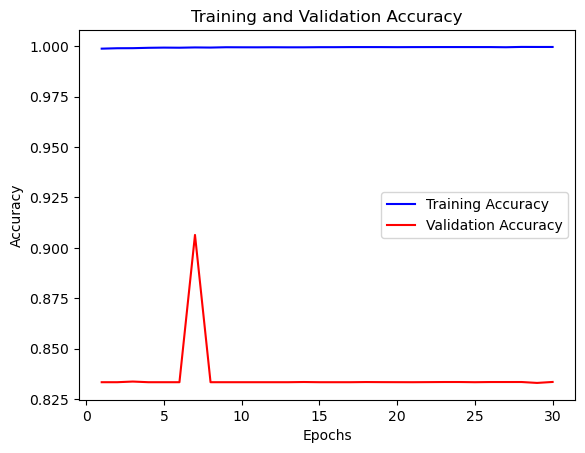

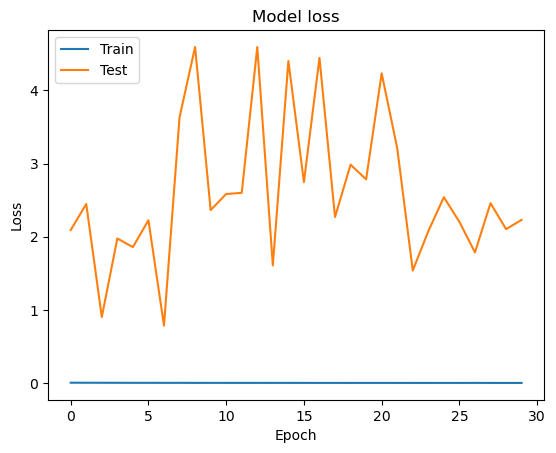

['loss', 'accuracy']


NameError: name 'RoC_Curve' is not defined

In [147]:
import time
model_lstm = compile_train(model_lstm,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [66]:
gru_bilstm = GRU_BiLSTM_model(82)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 82, 64)            12864     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 38753 (151.38 KB)
Trainable params: 38753 (151.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/30
5760/5760 [==============================] - 437s 75ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 2/30
5760/5760 [==============================] - 433s 75ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0026 - val_accuracy: 0.9991
Epoch 3/30
5760/5760 [==============================] - 284s 49ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 7.3281e-04 - val_accuracy: 0.9998
Epoch 4/30
5760/5760 [==============================] - 284s 49ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 8.0986e-04 - val_accuracy: 0.9998
Epoch 5/30
5760/5760 [==============================] - 280s 49ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 6.7955e-04 - val_accuracy: 0.9998
Epoch 6/30
5760/5760 [==============================] - 262s 46ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 7.5941e-04 - val_accuracy: 0.9998
Epoch 7/30
5760/5760 [==============================] - 260s 45ms/step - loss: 8.5282e-04 - accuracy: 

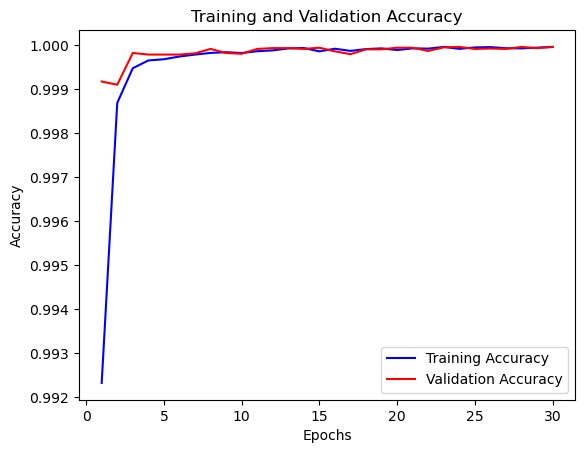

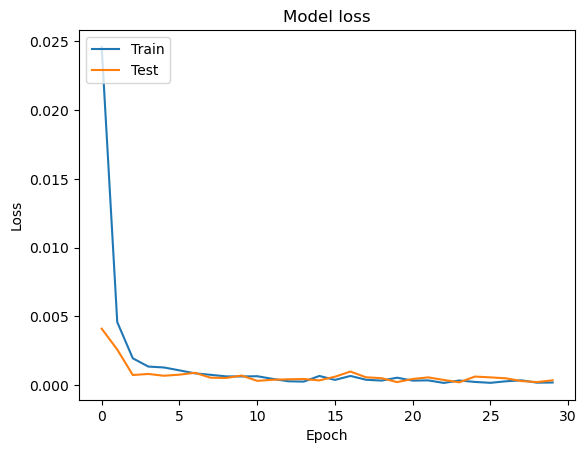

['loss', 'accuracy']


NameError: name 'RoC_Curve' is not defined

In [67]:
gru_bilstm = compile_train(gru_bilstm, format_3d(X_train), y_train, format_3d(X_test), y_test)

In [68]:
y_pred =gru_bilstm.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(gru_bilstm,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GRU_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


3423/3423 [==============================] - 36s 10ms/step - loss: 3.4897e-04 - accuracy: 1.0000
[0.0003489705268293619, 0.999954342842102]

Accuracy
0.9999543466549794

Precision
0.9999669293942567

Recall
0.9999779526864652

F1 Score
0.9999724410099817

False Positive Rate (FPR)
0.0001595150741745095

Average (acc, prec, rec, f1, FPR)
0.8000062369639714
3423/3423 [==============================] - 58s 17ms/step - loss: 3.4897e-04 - accuracy: 1.0000

Testing Time: 57.935s
Training Time: 35.921s


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\2686303029.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'GRU_Bilstm', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


AttributeError: module 'matplotlib.pyplot' has no attribute 'boxes'

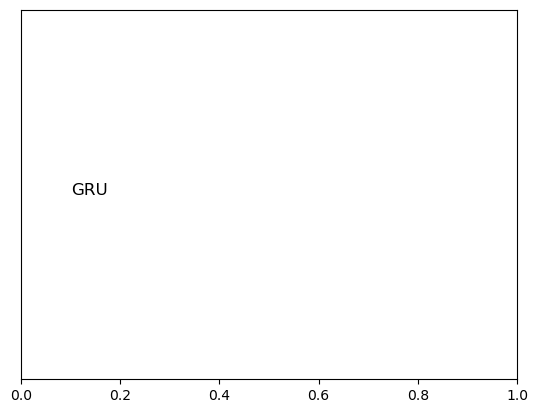

In [1]:
import matplotlib.pyplot as plt

layers = [
    {"type": "GRU", "units": 64},
    {"type": "Bidirectional LSTM", "units": 32},
    {"type": "Dense", "units": 16},
    {"type": "Dense", "units": 1}
]

plt.figure()
plt.yticks([])

for i, layer in enumerate(layers):
    plt.text(0.1 if i==0 else 0, 0.5, layer['type'], fontsize=12)
    plt.boxes([0.05, 0.3], width=0.9, height=0.2)
    if i > 0:
        plt.arrow(0.25, 0.5, 0, -0.25, width=0.01, head_width=0.1, 
                  head_length=0.08, length_includes_head=True)
        
plt.title("GRU BiLSTM Hybrid Model")
plt.tight_layout()
plt.savefig("hybrid_model.png")
plt.show()

In [88]:
mode_cnn = CNN_model(82)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 67, 32)            544       
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 33, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 31, 16)            1552      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 15, 16)            0         
 ng1D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 15, 16)            0         
                                                                 
 flatten_10 (Flatten)        (None, 240)             

Epoch 1/30
5760/5760 [==============================] - 22s 4ms/step - loss: 49002.7969 - accuracy: 0.7412 - val_loss: 9.4864 - val_accuracy: 0.8941
Epoch 2/30
5760/5760 [==============================] - 21s 4ms/step - loss: 52.6138 - accuracy: 0.7676 - val_loss: 0.3851 - val_accuracy: 0.9424
Epoch 3/30
5760/5760 [==============================] - 22s 4ms/step - loss: 0.5053 - accuracy: 0.7608 - val_loss: 0.4712 - val_accuracy: 0.8834
Epoch 4/30
5760/5760 [==============================] - 20s 4ms/step - loss: 0.5388 - accuracy: 0.6616 - val_loss: 0.4287 - val_accuracy: 0.8870
Epoch 5/30
5760/5760 [==============================] - 21s 4ms/step - loss: 1182.9709 - accuracy: 0.7138 - val_loss: 0.2426 - val_accuracy: 0.9604
Epoch 6/30
5760/5760 [==============================] - 21s 4ms/step - loss: 158.1384 - accuracy: 0.8368 - val_loss: 0.3159 - val_accuracy: 0.9455
Epoch 7/30
5760/5760 [==============================] - 20s 4ms/step - loss: 0.2961 - accuracy: 0.8724 - val_loss: 0.128

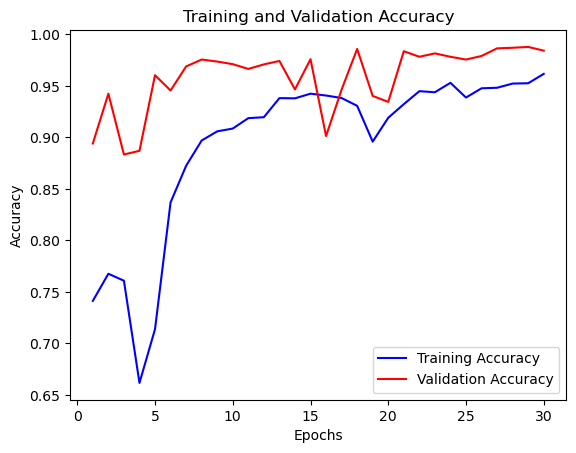

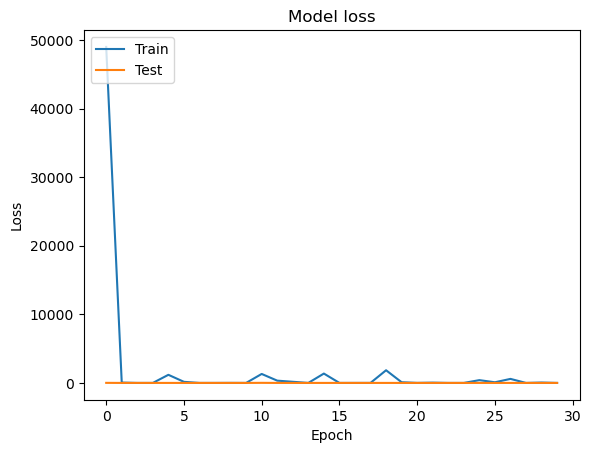

['loss', 'accuracy']


NameError: name 'RoC_Curve' is not defined

In [90]:
mode_cnn = compile_train(mode_cnn,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [91]:
y_pred =mode_cnn.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(mode_cnn,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'CNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


3423/3423 [==============================] - 3s 994us/step - loss: 0.1268 - accuracy: 0.9842
[0.12677423655986786, 0.9842222332954407]

Accuracy
0.9842222039608842

Precision
0.994037308461026

Recall
0.9868708247899993

F1 Score
0.9904411032559993

False Positive Rate (FPR)
0.0285531982772372

Average (acc, prec, rec, f1, FPR)
0.7968249277490292
3423/3423 [==============================] - 3s 999us/step - loss: 0.1268 - accuracy: 0.9842

Testing Time: 3.523s
Training Time: 3.613s


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\892581564.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'CNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [94]:
from keras.layers import GRU
model_gru = GRU_model(82)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 16)                1040      
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13921 (54.38 KB)
Trainable params: 13921 (54.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [98]:
model_dnn = DNN_model(X_train.shape[1])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 2)                 166       
                                                                 
 dense_32 (Dense)            (None, 1)                 3         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/30
5760/5760 [==============================] - 8s 1ms/step - loss: 5099827.0000 - accuracy: 0.5009 - val_loss: 0.6883 - val_accuracy: 0.8288
Epoch 2/30
5760/5760 [==============================] - 10s 2ms/step - loss: 0.6921 - accuracy: 0.5002 - val_loss: 0.6938 - val_accuracy: 0.1717
Epoch 3/30
5760/5760 [==============================] - 9s 1ms/step - loss: 0.6921 - accuracy: 0.5014 - val_loss: 0.6897 - val_accuracy: 0.8288
Epoch 4/30
5760/5760 [==============================] - 9s 2ms/step - loss: 0.6921 - accuracy: 0.4998 - val_loss: 0.6900 - val_accuracy: 0.8288
Epoch 5/30
5760/5760 [==============================] - 8s 1ms/step - loss: 0.6921 - accuracy: 0.5002 - val_loss: 0.6938 - val_accuracy: 0.1717
Epoch 6/30
5760/5760 [==============================] - 9s 2ms/step - loss: 0.6921 - accuracy: 0.5009 - val_loss: 0.6922 - val_accuracy: 0.8288
Epoch 7/30
5760/5760 [==============================] - 8s 1ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6947 - val_ac

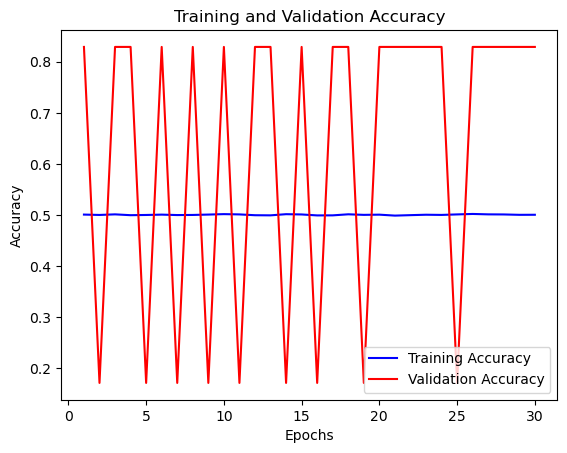

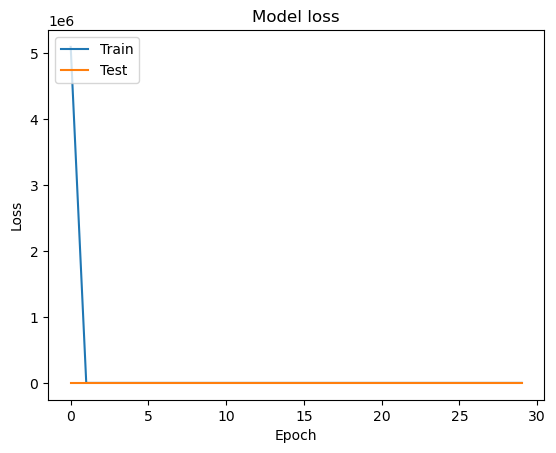

['loss', 'accuracy']


NameError: name 'dt' is not defined

In [99]:
model_dnn = compile_train(model_dnn,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [100]:
y_pred = model_dnn.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_dnn,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'DNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


3423/3423 [==============================] - 3s 756us/step - loss: 0.6864 - accuracy: 0.8288
[0.6864051222801208, 0.8288365006446838]

Accuracy
0.8288364788488053

Precision
0.8287410926365796

Recall
1.0

F1 Score
0.9063514742174308

False Positive Rate (FPR)
0.9967565268251183

Average (acc, prec, rec, f1, FPR)
0.9121371145055868
3423/3423 [==============================] - 3s 789us/step - loss: 0.6864 - accuracy: 0.8288

Testing Time: 2.798s
Training Time: 2.783s


IndexError: single positional indexer is out-of-bounds

In [106]:
 model_ann = ANN_model(82)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                5312      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7425 (29.00 KB)
Trainable params: 7425 (29.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/30
5760/5760 [==============================] - 8s 1ms/step - loss: 787054.4375 - accuracy: 0.7668 - val_loss: 218717.3906 - val_accuracy: 0.8429
Epoch 2/30
5760/5760 [==============================] - 9s 1ms/step - loss: 268718.3125 - accuracy: 0.8337 - val_loss: 217132.3125 - val_accuracy: 0.8535
Epoch 3/30
5760/5760 [==============================] - 11s 2ms/step - loss: 132727.8906 - accuracy: 0.8600 - val_loss: 58587.1484 - val_accuracy: 0.8837
Epoch 4/30
5760/5760 [==============================] - 10s 2ms/step - loss: 58603.4727 - accuracy: 0.8728 - val_loss: 46177.7656 - val_accuracy: 0.8924
Epoch 5/30
5760/5760 [==============================] - 9s 2ms/step - loss: 26100.5684 - accuracy: 0.8779 - val_loss: 12740.3066 - val_accuracy: 0.9076
Epoch 6/30
5760/5760 [==============================] - 8s 1ms/step - loss: 9949.9893 - accuracy: 0.8780 - val_loss: 30597.6387 - val_accuracy: 0.6396
Epoch 7/30
5760/5760 [==============================] - 8s 1ms/step - loss: 2962.4

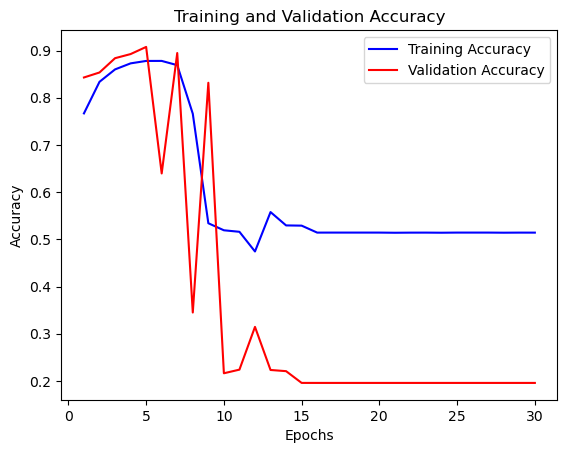

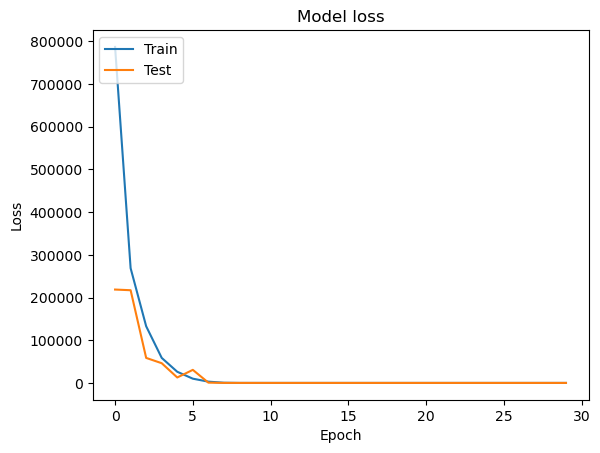

['loss', 'accuracy']


NameError: name 'dt' is not defined

In [107]:
 model_ann = compile_train( model_ann,format_3d(X_train), y_train, format_3d(X_test), y_test)

In [108]:
y_pred = model_ann.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes( model_ann,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'ANN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


3423/3423 [==============================] - 3s 821us/step - loss: 0.6815 - accuracy: 0.1959
[0.6815409660339355, 0.19587111473083496]

Accuracy
0.19587111147633787

Precision
0.9996222138269739

Recall
0.029168595806600965

F1 Score
0.05668319748074677

False Positive Rate (FPR)
5.317169139150316e-05

Average (acc, prec, rec, f1, FPR)
0.2562796580564102
3423/3423 [==============================] - 3s 816us/step - loss: 0.6815 - accuracy: 0.1959

Testing Time: 2.887s
Training Time: 3.010s


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\1417061495.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'ANN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [109]:
from tensorflow import keras
from tensorflow.keras import layers

def build_hybrid_model():
    model = keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(32, kernel_size=16, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM layer
    model.add(layers.LSTM(64, return_sequences=True))
    
    # GRU layer
    model.add(layers.GRU(32, return_sequences=True))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Build the hybrid model
model = build_hybrid_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}') 
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/30
5760/5760 [==============================] - 98s 16ms/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.0697 - val_accuracy: 0.9735
Epoch 2/30
5760/5760 [==============================] - 71s 12ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 3/30
5760/5760 [==============================] - 115s 20ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0173 - val_accuracy: 0.9938
Epoch 4/30
5760/5760 [==============================] - 81s 14ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0242 - val_accuracy: 0.9907
Epoch 5/30
5760/5760 [==============================] - 70s 12ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0113 - val_accuracy: 0.9961
Epoch 6/30
5760/5760 [==============================] - 70s 12ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0234 - val_accuracy: 0.9914
Epoch 7/30
5760/5760 [==============================] - 72s 12ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0180 

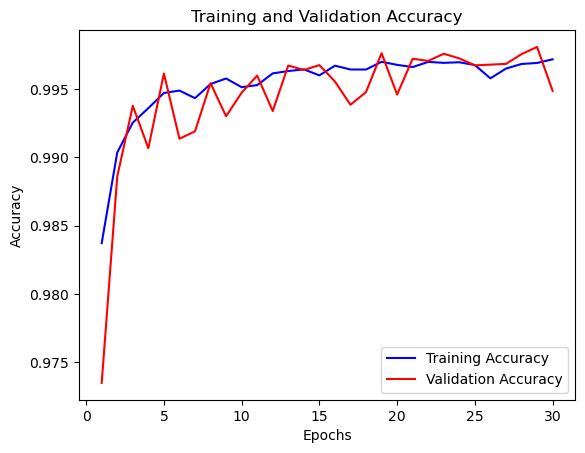

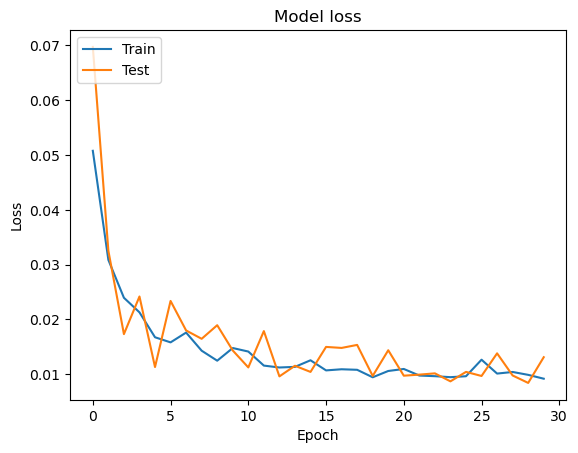

In [110]:
# Plot the accuracy graph
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [111]:
y_pred = model.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model,format_3d(X_test),y_test,y_pred)
#acc,fpr, prec, rec, f1, avrg = testes(model_cnn, format_3d(X_train), y_train, format_3d(X_test), y_test)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'CNN_LSTM_GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


3423/3423 [==============================] - 19s 5ms/step - loss: 0.0131 - accuracy: 0.9949
[0.013088795356452465, 0.9948594570159912]

Accuracy
0.9948594333506816

Precision
0.9992357873052088

Recall
0.994554313556893

F1 Score
0.9968895543167792

False Positive Rate (FPR)
0.0036688467060137183

Average (acc, prec, rec, f1, FPR)
0.7978415870471152
3423/3423 [==============================] - 18s 5ms/step - loss: 0.0131 - accuracy: 0.9949

Testing Time: 17.744s
Training Time: 19.413s


C:\Users\M.A\AppData\Local\Temp\ipykernel_10996\2086103191.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Method':'CNN_LSTM_GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,


In [115]:
import xgboost
#xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
from xgboost import XGBClassifier 
import xgboost as xgb

model_xgboost = xgb.XGBClassifier()
def xgboost():
    return XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
y_pred = model_xgboost.predict(X_test) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_xgboost,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'xgboost', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)



Accuracy
0.9999634773239835

Precision
1.0

Recall
0.9999559053729303

F1 Score
0.9999779522003704

False Positive Rate (FPR)
0.0

Average (acc, prec, rec, f1, FPR)
0.7999794669794569


AttributeError: 'XGBClassifier' object has no attribute 'evaluate'

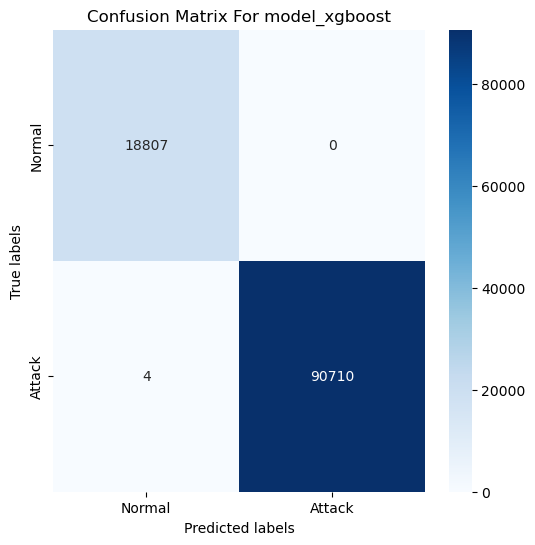

In [117]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
samples = y_test  # Actual labels
y_pred = model_xgboost.predict(X_test) 

# Use y_test here instead of y_true
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            ax=ax,
            cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For model_xgboost'); 
ax.xaxis.set_ticklabels(['Normal', 'Attack']) 
ax.yaxis.set_ticklabels(['Normal', 'Attack']);

In [118]:
from sklearn.svm import SVC
model_svm = SVM()

In [1]:
model_svm = SVM()
model_svm.fit(X_train, y_train) 
y_pred = model_svm.predict(X_test)

NameError: name 'SVM' is not defined

In [ ]:
y_pred = model_svm.predict(X_test) 

y_pred = y_pred.round()
 
acc,fpr, prec, rec, f1, avrg, test_time, train_time = testes(model_svm,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'SVM', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,'False Positive Rate (FPR)':fpr,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk, 'Test_Time':test_time , 'Train_Time':train_time}, ignore_index=True)


In [ ]:
# RoC Curve 
# RoC curve Function 

def RoC_Curve_SVM(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.decision_function(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()
